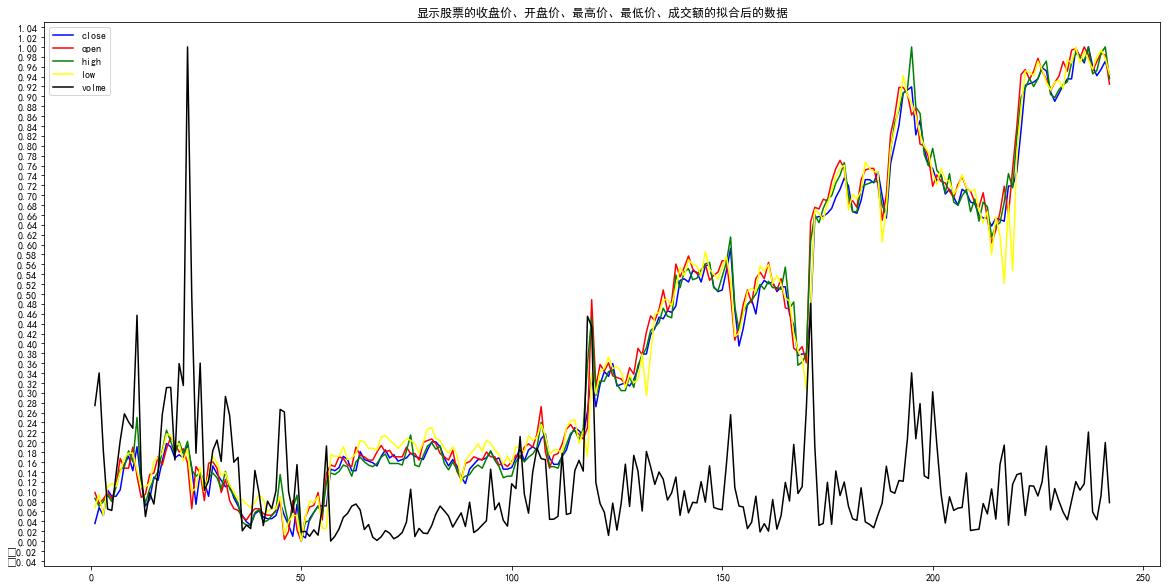

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

# for reproducibility，再现性，利用随机数种子，使得每次生成的随机数相同
np.random.seed(1337)
# df读取数据
df = pd.read_excel('data.xlsx')

# normalization数据归一化
#利用sklearn的MinMaxScaler函数将属性放缩到0和1之间
scaler = MinMaxScaler(feature_range=(0, 1))
#fit_transform()先拟合数据，再标准化
df['volume'] = scaler.fit_transform(np.reshape(np.array(df['volume']),(-1,1)))
df['close'] = scaler.fit_transform(np.reshape(np.array(df['close']),(-1,1)))
df['low'] = scaler.fit_transform(np.reshape(np.array(df['low']),(-1,1)))
df['high'] = scaler.fit_transform(np.reshape(np.array(df['high']),(-1,1)))
df['open'] = scaler.fit_transform(np.reshape(np.array(df['open']),(-1,1)))

datas =df['close'][1:]
datas1 =df['open'][1:]
datas2 =df['high'][1:]
datas3 =df['low'][1:]
datas4 =df['volume'][1:]
plt.figure(facecolor='white',figsize=(20,10))
datas.plot(color='blue', label='close')
datas1.plot(color='red', label='open')
datas2.plot(color='green', label='high')
datas3.plot(color='yellow', label='low')
datas4.plot(color='BLACK', label='volme')
ax = plt.gca()
#ax.locator_params(nbins=5) #xy轴同时调整
#ax.locator_params('x',nbins=10) #只调整x轴
ax.locator_params('y',nbins=100) #只调整y轴
plt.legend(loc='best')
plt.title(U"显示股票的收盘价、开盘价、最高价、最低价、成交额的拟合后的数据")
plt.show()

In [30]:


# 通过cnn生成所需的数据格式
#数据预处理（划分成5×5）
X_data,Y_data = list(),list()
for i in range(len(df['close'])-5):
    for j in range(5):
        X_data.append(df['close'][i+j])
        X_data.append(df['open'][i+j])
        X_data.append(df['high'][i+j])
        X_data.append(df['low'][i+j])
        X_data.append(df['volume'][i+j])

# 拆分数据以训练和测试集，训练集为前一半的数据，测试集为后一半的数据
#对数据进行切片，划分成5×5矩阵（5天，5特征）
X_train = np.array(X_data[:int(len(X_data)*0.5)]).reshape(-1,5,5,1)
X_test = np.array(X_data[int(len(X_data)*0.5):]).reshape(-1,5,5,1)

for i in range(len(df['close'])-5):
    Y_data.append(df['label'][i])
Y_train = np.array(Y_data[:int(len(Y_data)*0.5)]).reshape(-1,1)
Y_test = np.array(Y_data[int(len(Y_data)*0.5):]).reshape(-1,1)
Y_train = keras.utils.to_categorical(Y_train,num_classes=2)
Y_test = keras.utils.to_categorical(Y_test,num_classes=2)


In [31]:
# 全局变量
batch_size = 32
nb_classes = 2
epochs = 180

# 输入数据尺寸
img_rows, img_cols =  5, 5

# 使用的卷积滤波器数量
nb_filters1 = 32
nb_filters2 = 16

# 最大池的池区域大小
pool_size = (2, 2)

# 卷积核大小
kernel_size = (3, 3)

# 输入形式
input_shape = (img_rows, img_cols, 1)

# 传输格式
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')

In [32]:
# 用 Keras定义CNN模型
model = Sequential()
#卷积层1，32个滤波器，滤波器窗口大小（3，3）卷积（过滤）方式same，输入形状 ，激活函数relu
model.add(Convolution2D(nb_filters1, (kernel_size[0], kernel_size[1]),padding='same',input_shape=input_shape,activation='relu'))  
# 最大池层，池窗口的大小（2,2）
model.add(MaxPooling2D(pool_size=pool_size))  
#卷积层2，16个滤波器，滤波器窗口大小（3，3），卷积（过滤）方式same，输入形状 ，激活函数relu
model.add(Convolution2D(nb_filters2, (kernel_size[0], kernel_size[1]),padding='same',activation='relu')) 
# 最大池层，池窗口的大小（2,2）
model.add(MaxPooling2D(pool_size=pool_size))  
# Flatten层用来把多维的输入一维化，常用在从卷积层到全连接层的过渡
model.add(Flatten())  
# 全连接层，定义了一个有128个神经元，使用relu激活函数的神经层
model.add(Dense(128,activation='relu'))  
 # 退出
model.add(Dropout(0.5)) 
 # 全连接层，定义了一个有2个神经元的神经层
model.add(Dense(nb_classes)) 
# Softmax选择最佳结果
model.add(Activation('softmax'))  

# 编译模型，损失函数设为多分类的对数损失函数，优化器为adadelta，评价函数accuracy
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

# 拟合/训练模型，batch_size，进行梯度下降时每个batch包含的样本数为32，epochs: 训练时全部样本的迭代次数为180。
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1)

Epoch 1/180
119/119 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4622
Epoch 2/180
119/119 [==============================] - 0s 118us/step - loss: 0.6909 - accuracy: 0.5294
Epoch 3/180
119/119 [==============================] - 0s 110us/step - loss: 0.6924 - accuracy: 0.5042
Epoch 4/180
119/119 [==============================] - 0s 118us/step - loss: 0.6871 - accuracy: 0.5378
Epoch 5/180
119/119 [==============================] - 0s 117us/step - loss: 0.6837 - accuracy: 0.5546
Epoch 6/180
119/119 [==============================] - 0s 110us/step - loss: 0.6837 - accuracy: 0.5462
Epoch 7/180
119/119 [==============================] - 0s 135us/step - loss: 0.6844 - accuracy: 0.5462
Epoch 8/180
119/119 [==============================] - 0s 126us/step - loss: 0.6896 - accuracy: 0.5462
Epoch 9/180
119/119 [==============================] - 0s 126us/step - loss: 0.6834 - accuracy: 0.5462
Epoch 10/180
119/119 [==============================] - 0s 126us/step - los

119/119 [==============================] - 0s 110us/step - loss: 0.1639 - accuracy: 0.9244
Epoch 158/180
119/119 [==============================] - 0s 110us/step - loss: 0.1613 - accuracy: 0.9412
Epoch 159/180
119/119 [==============================] - 0s 126us/step - loss: 0.2251 - accuracy: 0.8739
Epoch 160/180
119/119 [==============================] - 0s 110us/step - loss: 0.1497 - accuracy: 0.9496
Epoch 161/180
119/119 [==============================] - 0s 110us/step - loss: 0.1280 - accuracy: 0.9748
Epoch 162/180
119/119 [==============================] - 0s 110us/step - loss: 0.1692 - accuracy: 0.9412
Epoch 163/180
119/119 [==============================] - 0s 118us/step - loss: 0.1754 - accuracy: 0.9244
Epoch 164/180
119/119 [==============================] - 0s 118us/step - loss: 0.1462 - accuracy: 0.9580
Epoch 165/180
119/119 [==============================] - 0s 110us/step - loss: 0.1578 - accuracy: 0.9328
Epoch 166/180
119/119 [==============================] - 0s 110us/ste

In [33]:
# 评估模型，verbose = 0 不在标准输出流输出日志信息
score = model.evaluate(X_test, Y_test, verbose=0)
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 5, 5, 32)          320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 16)          4624      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               2176      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [34]:
prd = model.predict(X_test)
#  显示模型性能
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.8200359023919627
Test accuracy: 0.7983193397521973
